In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", 
                 sep='\t', header=None, names=['label', 'message'])

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


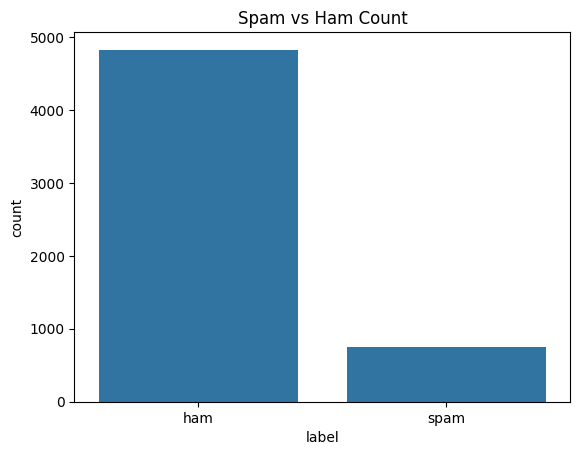

label      0
message    0
dtype: int64


In [4]:
# Show class distribution
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Count")
plt.show()

# Check for missing values
print(df.isnull().sum())


In [5]:
# Convert labels to binary (ham=0, spam=1)
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)


In [6]:
model = MultinomialNB()
model.fit(X_train_tf, y_train)


MultinomialNB()

Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



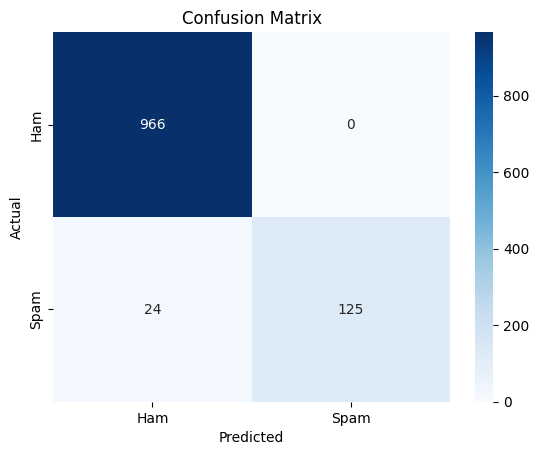

In [7]:
y_pred = model.predict(X_test_tf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
def predict_spam(text):
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)[0]
    return "Spam" if prediction == 1 else "Ham"

# Test it
print(predict_spam("You have won $1000! Call now to claim."))
print(predict_spam("Hi John, are we still meeting tomorrow?"))


Spam
Ham
